# Daisyworld °❀.ೃ࿔*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


En 1983, en respuesta a críticas que había recibido James Lovelock sobre su hipótesis de Gaia, Watson y Lovelock publicaron un modelo llamado "Daisy World" o "Mundo de Margaritas". La hipótesis de Gaia propone, básicamente, que el planeta Tierra puede ser considerado como un organismo vivo que tiene la propiedad de autorregulación.

El mundo imaginario Daisy World es un planeta tipo Tierra que orbita un Sol cuya luminosidad va creciendo paulatinamente, tal como ocurre con nuestro Sol. El planeta no tiene atmósfera ni océano, pero sí suelos fértiles en los cuales crecen dos tipos de plantas: margaritas blancas y margaritas negras. Ambas plantas difieren solamente en la cantidad de radiación solar que absorben, o en su "albedo". De esta manera, cuando hay muchas margaritas blancas, la temperatura local es más fría que sin la presencia de ellas, ya que el blanco refleja la luz. Por otro lado, con margaritas negras, la temperatura local es más cálida que sin la presencia de estas pues el negro aborbe. A su vez, las margaritas crecen dentro de ciertos rangos de temperatura. De esta manera, la temperatura final de equilibrio del planeta depende, por un lado, de la luminosidad del Sol y, también, de la cantidad y tipo de margaritas que crezcan sobre él, demostrando cómo la vida misma puede regular la temperatura del planeta para mantenerla dentro de los rangos propicios para la vida misma, es decir, dando soporte a la hipótesis de Gaia.


Se asume que el planeta se encuentra en **balance energético**, por lo que utilizando la ley de Stefan-Boltzman la temperatura del planeta se halla igualando la radiación emitida con la absorbida:

\begin{equation}
  \sigma T^4 = \frac{S_o}{4} ( 1 - A_p ) \tag{1}
\end{equation}
Donde



*   $T$: Temperatura de emisión de cuerpo negro en balance energético $[K]$.
*   $\sigma$: $5.67 \times 10^{-8}$ [Wm$^{-2}$K$^{-4}$], constante de Stefan-Boltzmann.
*   $A_p$: Albedo planetario total.
*   $S_o$: Luminosidad solar

En el modelo simple se ignora la geometría esférica del planeta y se trata como una superficie plana, por lo que su albedo total viene dado por la ponderación de los albedos.

\begin{equation}
  A_p = A_n \alpha_n + A_b \alpha_b + A_s \alpha_s \tag{2}
\end{equation}

Donde:

*   $A_n$: Albedo de margaritas negras (Black Daisies).
*   $A_b$: Albedo de margaritas blancas (White Daisies).
*   $A_s$: Albedo de suelo desnudo.
*   $\alpha_n$: Fracción de planeta cubierto por margaritas negras (Black Daisies).
*   $\alpha_b$: Fracción de planeta cubierto por margaritas blancas (White Daisies).
*   $\alpha_s$: Fracción de planeta de suelo desnudo ($1-\alpha_b-\alpha_n$)



Las ecuaciones de crecimiento de cada margarita están dadas por las siguientes ecuaciones diferenciales:

\begin{equation}
  \frac{d\alpha_n}{dt} = \alpha_n (\beta_n * (1-\alpha_b-\alpha_n) - \gamma) \\
  \frac{d\alpha_b}{dt} = \alpha_b (\beta_b *(1-\alpha_b-\alpha_n) - \gamma) \tag{3}
\end{equation}


Donde $\gamma$ es la tasa de muerte (constante) de las margaritas, y $\beta_i$ es la tasa de crecimiento de las respectivas margaritas que depende de la temperatura local $T_i$ y ocurre solamente entre los rangos de $T_{min}$ y $T_{max}$:

\begin{equation}
  \beta_i = (T_i - T_{min}) * (T_{max} - T_i) \frac{4}{(T_{max} - T_{min})^2} \tag{4}
\end{equation}


Para las temperaturas locales se utiliza:

\begin{equation}
  T_i = q \left( (A_p - A_i) \right) + T \tag{5}
\end{equation}

Donde q es una constante positiva que se puede interpretar como el flujo de calor horizontal.





⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯‧₊˚𖤣 𖥧‧₊⚘ ❀༉˚.⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯



## Daisyworld simple (con método de Euler)

Ambas margaritas existen


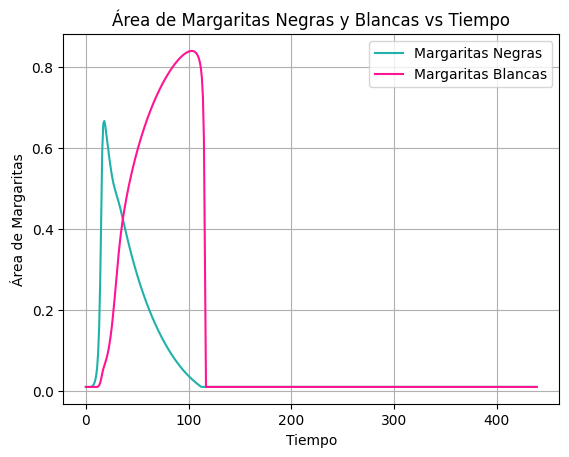

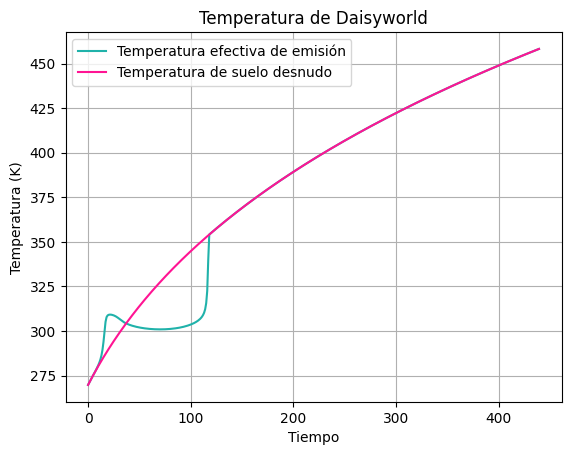

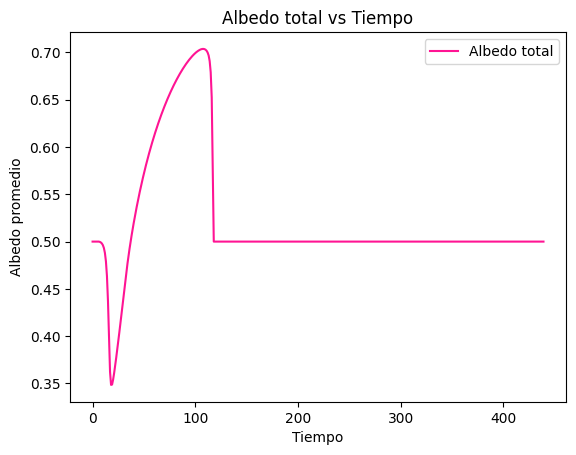

In [ ]:

# Función beta (4)
def beta(lowgrowthK,highgrowthK,Ti):
  bb = (Ti-lowgrowthK)*(highgrowthK-Ti)*4/((highgrowthK-lowgrowthK)**2)
  return bb


def daisyworld0D(lower,upper):
  # Parámetros iniciales
  iniblack = True
  iniwhite = True


  S = 1000 #energía solar en W/m^2
  q = 15 #flujo de calor horizontal
  black = 0.25 # albedo de margaritas negras
  white = 0.75 # albedo de margaritas blancas
  death = 0.1 # tasa de muerte de margaritas
  bare = 0.5 # albedo de suelo desnudo
  lowgrowthK = 278 # T mínima para el crecimiento de margaritas
  highgrowthK = 313 # T máxima para el crecimiento de margaritas

  startarea = 0.01 # área inicial cubierta por margaritas (fracción de 1)
  numba = 100 # número de pasos de tiempo relativos

  SB = 5.669*10**(-8) # constante de Stefan-Boltzman


  # Inicializa el área de las margaritas para permitir que comience el crecimiento
  if iniblack and iniwhite:
      print('Ambas margaritas existen')
      Ablack = startarea
      Awhite = startarea
  elif iniblack and not iniwhite:
      print('Sólo existen margaritas negras')
      Ablack = startarea
      Awhite = 0
  elif iniwhite and not iniblack:
      print('Sólo existen margaritas blancas')
      Ablack = 0
      Awhite = startarea


  # Calcula el número de pasos de tiempo

  length = round((upper-lower)*numba)
  boof = abs(length)

  # Definimos la variación de la insolación solar

  if length > 0:  # si la insolación aumenta
      jump = (upper * S - lower * S) / (length - 1)
      E = [lower * S]
      for a in range(1, length):
          E.append(E[a - 1] + jump)

  if length < 0:  # si la insolación disminuye
      jump = (lower * S - upper * S) / (boof + 1)
      E = [lower * S]
      for a in range(1, boof):
          E.append(E[a - 1] - jump)

  if length < 0:
      length = abs(length)

  # Listas vacías para ir almacenando resultados en cada iteración

  Temissionresults = []
  Ablackresults = []
  Awhiteresults = []
  Trockresults = []
  Apresults = []

  # Iteraciones para cada paso de tiempo
  for a in range(length):

    Abare = 1 - Ablack - Awhite # área de suelo desnudo
    Ap = Abare*bare + Awhite*white + Ablack*black # albedo promedio (2)

    Temission = ((E[a] / SB) * (1 - Ap))**0.25 # T utilizando fórmula (1)
    Trock = ((E[a] / SB) * (1 - bare))**0.25 # temperatura en el caso de planeta sin vida
    Tblack = q * (Ap - black) + Temission # función (5)
    Twhite = q * (Ap - white) + Temission

    growthb = Ablack * (beta(lowgrowthK, highgrowthK, Tblack) * Abare - death) # ecuaciones (3)
    growthw = Awhite * (beta(lowgrowthK, highgrowthK, Twhite) * Abare - death)
    Ablack += growthb # actualizamos áreas
    Awhite += growthw

    # Nos aseguramos que el área este en un rango factible
    if iniblack and not iniwhite:
        Ablack = max(startarea, min(Ablack, 1))
    elif iniwhite and not iniblack:
        Awhite = max(startarea, min(Awhite, 1))
    elif iniwhite and iniblack:
        Ablack = max(startarea, min(Ablack, 1))
        Awhite = max(startarea, min(Awhite, 1))

    Temissionresults.append(Temission)
    Ablackresults.append(Ablack)
    Awhiteresults.append(Awhite)
    Trockresults.append(Trock)
    Apresults.append(Ap)


  # Gráfico del área de margaritas vs tiempo
  plt.plot(Ablackresults, label='Margaritas Negras', color='lightseagreen')
  plt.plot(Awhiteresults, label='Margaritas Blancas', color='deeppink')
  plt.title('Área de Margaritas Negras y Blancas vs Tiempo')
  plt.xlabel('Tiempo')
  plt.ylabel('Área de Margaritas')
  plt.legend()
  plt.grid(True)
  plt.show()

  # Gráfico de temperatura vs tiempo
  plt.plot(Temissionresults, label='Temperatura efectiva de emisión', color='lightseagreen')
  plt.plot(Trockresults, label='Temperatura de suelo desnudo', color='deeppink')
  plt.title('Temperatura de Daisyworld')
  plt.xlabel('Tiempo')
  plt.ylabel('Temperatura (K)')
  plt.legend()
  plt.grid(True)
  plt.show()

  # Albedo total vs tiempo
  plt.plot(Apresults, label='Albedo total', color='deeppink')
  plt.title('Albedo total vs Tiempo')
  plt.xlabel('Tiempo')
  plt.ylabel('Albedo promedio')
  plt.legend()


daisyworld0D(0.6,5)

## Daisyworld simple (con RK4)

aaaa

## Daisyworld con retroalimentaciones

A continuación, modelos modificados de Daisyworld que toman en cuenta efectos climáticos y geográficos.

### Funciones auxiliares

In [ ]:
#función a utilizar en Daisylatitude y Daisyice
def daisyworldb(Ablack, Awhite, transfer, black, bare, white, S, q, death, startarea, lowgrowthK, highgrowthK,iniblack,iniwhite):
    SB = 5.669*10**(-8)
    Abare = 1 - Ablack - Awhite
    Ap = Abare*bare + Awhite*white + Ablack*black

    Tsun = ((S / SB) * (1 - Ap))**0.25
    Temission = transfer + Tsun
    Trock = ((S / SB) * (1 - bare))**0.25
    Tblack = q * (Ap - black) + Temission
    Twhite = q * (Ap - white) + Temission

    growthb = Ablack * (beta(lowgrowthK, highgrowthK, Tblack) * Abare - death)
    growthw = Awhite * (beta(lowgrowthK, highgrowthK, Twhite) * Abare - death)
    Ablack += growthb
    Awhite += growthw

    if iniblack and not iniwhite:
        Ablack = max(startarea, min(Ablack, 1))
    elif iniwhite and not iniblack:
        Awhite = max(startarea, min(Awhite, 1))
    elif iniwhite and iniblack:
        Ablack = max(startarea, min(Ablack, 1))
        Awhite = max(startarea, min(Awhite, 1))

    return Ablack, Abare, Awhite, Temission, Trock, Tblack, Twhite, Ap, Tsun


In [ ]:
#función a utilizar en DaisyCO2
def daisyworldc(Ablack, Awhite, transfer, carb, carbav, rango, black, bare, white, S, q, death, startarea, lowgrowthK, highgrowthK, const, iniblack, iniwhite):
    SB = 5.669*10**(-8)
    Abare = 1 - Ablack - Awhite
    Ap = Abare*bare + Awhite*white + Ablack*black

    Tcarb = (rango/carb)*carbav - (rango/2) #calcula el efecto del dióxido de carbono en la temperatura

    Tsun = ((S / SB) * (1 - Ap))**0.25
    Temission = transfer + Tsun + Tcarb
    Trock = ((S / SB) * (1 - bare))**0.25
    Tblack = q * (Ap - black) + Temission
    Twhite = q * (Ap - white) + Temission

    # Para calcular la restriccion de crecimiento del CO2

    gres = 1 - np.exp(-const*carbav)
    growthb = Ablack * (beta(lowgrowthK, highgrowthK, Tblack)*gres*Abare - death)
    growthw = Awhite * (beta(lowgrowthK, highgrowthK, Twhite)*gres*Abare - death)
    Ablack += growthb
    Awhite += growthw

    if iniblack and not iniwhite:
        Ablack = max(startarea, min(Ablack, 1))
    elif iniwhite and not iniblack:
        Awhite = max(startarea, min(Awhite, 1))
    elif iniwhite and iniblack:
        Ablack = max(startarea, min(Ablack, 1))
        Awhite = max(startarea, min(Awhite, 1))

    return Ablack, Abare, Awhite, Temission, Trock, Tblack, Twhite, Ap, Tsun

### Daisyworld latitude

La principal diferencia entre este código y el código básico de Daisyworld radica en la incorporación de una dimensión latitudinal. Asumiendo simetría esférica, distribuye energía solar por latitud y considera intercambio de calor entre latitudes.

Dada $\theta \in [0,180]$ variable espacial (latitud) y $t$ variable temporal, consideramos la siguientes ecuaciones.

Para la distribución de energía solar por latitud:

\begin{equation}
S(\theta, t) = sin\left(\frac{\theta\pi}{180}\right)\cdot S_o(\theta, t)
\end{equation}

Notamos que $S(\theta, t)$ es simétrica con respecto a $\theta = 90°$, donde alcanza su máximo. Esto se traduce en que, para un instante de tiempo fijo, la insolación solar es mayor en el ecuador y disminuye a medida que nos acercamos a los polos.

La temperatura total $T(\theta, t)$ de emisión de cuerpo negro se puede descomponer entre la temperatura dada por la **interacción con el medio externo ($T_1$)**, y la otorgada por la **redistribución interna del calor** ($T_2$).

\begin{equation}
T(\theta, t) = T_{1}(\theta, t) + T_2(\theta, t)
\end{equation}



Para obtener $T_1$ consideramos la ley de enfriamiento de Newton, que propone que la tasa de cambio de la temperatura es proporcional a la diferencia de temperatura entre el cuerpo y sus alrededores. Así, de manera discretizada:

\begin{equation}
T_1(\theta, t) = outgoingheat \cdot (T_{1}(\theta, t -1) - T_{sun}(\theta, t-1)) + T_{sun}(\theta, t)
\end{equation}

Con $T_{sun}(\theta, t) = \left( \frac{S(\theta, t)}{4 \sigma} \cdot (1 - A_p)\right)^{1/4} $.

Para $T_2$ consideramos un estado estacionario y definimos:



\begin{equation}
T_2(\theta, t) = heatcon \cdot k(\theta) \cdot (T(\theta -1,t) - T_1(\theta,t))
\end{equation}

Donde $heatcon$ es el coeficiente de transferencia de calor entre latitudes (constante), mientras $k(\theta) = 1 - \frac{180}{2} e^{\frac{-\theta}{q}}$ representa la eficiencia de la transferencia de calor en función a la latitud (asociado a la conductividad térmica).



Ambas margaritas existen


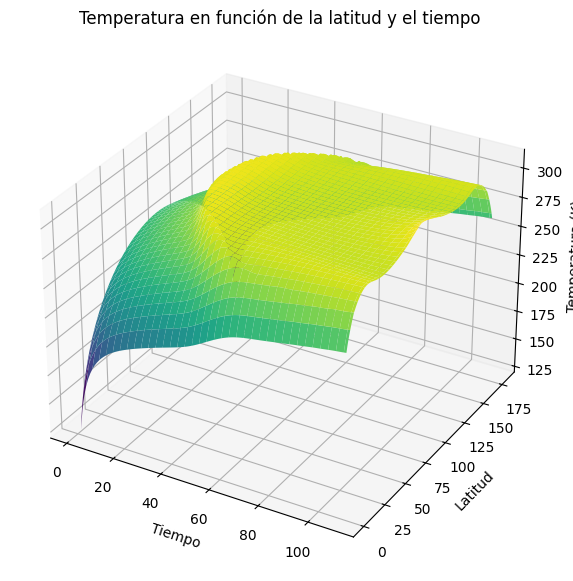

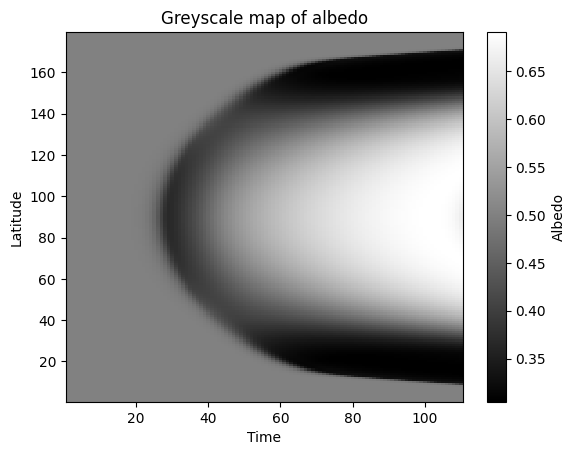

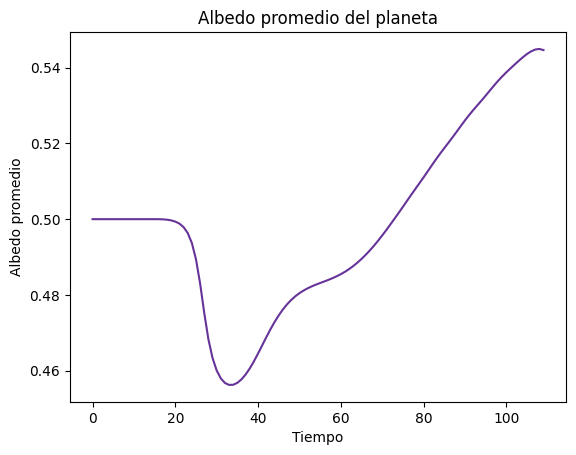

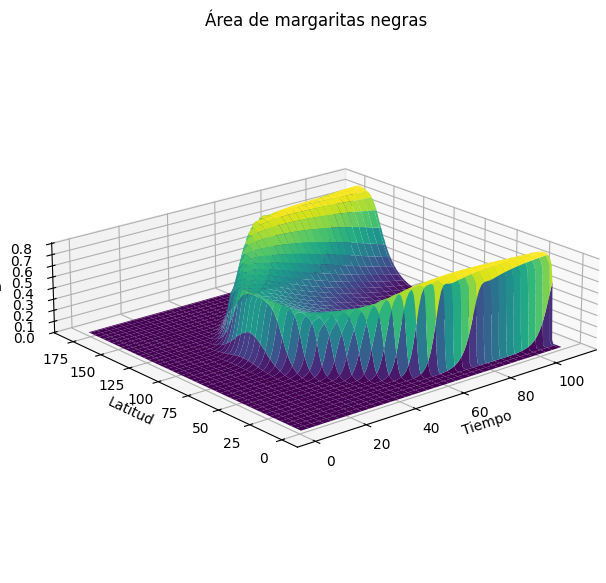

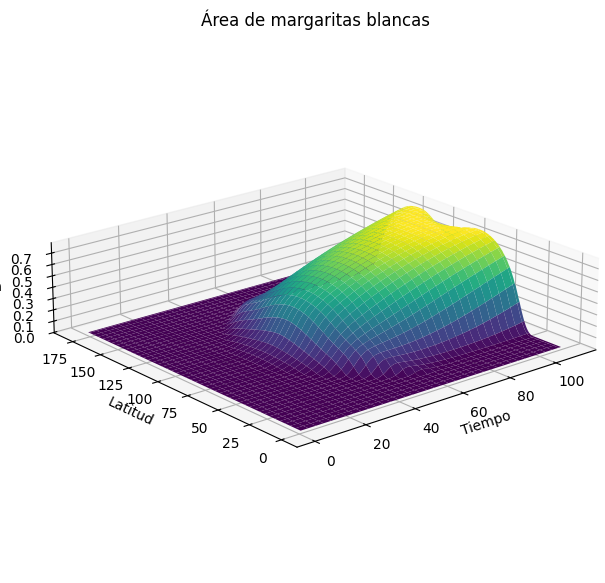

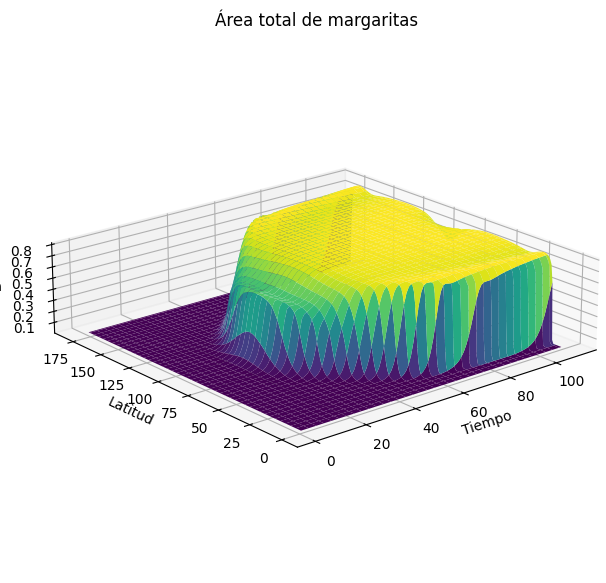

In [ ]:
def daisylatitude1(lower,upper):

  iniblack = True
  iniwhite = True
  S = 1000
  q = 20
  black = 0.25
  white = 0.75
  death = 0.2
  bare = 0.5
  lowgrowthK = 278
  highgrowthK = 313
  startarea = 0.01
  numba = 100
  SB = 5.669*10**(-8)

  # Parámetros agregados
  latdiv = 179 # número de divisiones de latitud
  heatcon = 0.75 # coeficiente de transferencia de calor
  outgoingheat = 0.9
  inc = 180/latdiv
  lat = np.arange(inc, 180, inc) # vector que contiene las altitudes del planeta
  d = len(lat)
  AB = startarea*np.ones(d)
  AW = startarea*np.ones(d)
  AP = np.zeros(d)
  transfer = np.zeros(d)

  # Inicializa el área de las margaritas para permitir que comience el crecimiento
  if iniblack and iniwhite:
      print('Ambas margaritas existen')
      Ablack = startarea
      Awhite = startarea
  elif iniblack and not iniwhite:
      print('Sólo existen margaritas negras')
      Ablack = startarea
      Awhite = 0
  elif iniwhite and not iniblack:
      print('Sólo existen margaritas blancas')
      Ablack = 0
      Awhite = startarea


  # Calcula el número de pasos de tiempo

  length = round((upper-lower)*numba)
  boof = abs(length)

  # Definimos la variación de la insolación solar

  if length > 0:  # si la insolación aumenta
      jump = (upper * S - lower * S) / (length - 1)
      E = [lower * S]
      for a in range(1, length):
          E.append(E[a - 1] + jump)

  if length < 0:  # si la insolación disminuye
      jump = (lower * S - upper * S) / (boof + 1)
      E = [lower * S]
      for a in range(1, boof):
          E.append(E[a - 1] - jump)

  if length < 0:
      length = abs(length)

  # Matrices de ceros para ir almacenando resultados en cada iteración

  Temissionresults = np.zeros((d, length))
  Tsun = np.zeros((d, length))
  Trockresults = np.zeros((d, length))
  Tblackresults = np.zeros((d, length))
  Twhiteresults = np.zeros((d, length))

  Ablackresults = np.zeros((d, length))
  Awhiteresults = np.zeros((d, length))
  Abareresults = np.zeros((d, length))
  Apresults = np.zeros((d, length))

  # Iteraciones para cada paso de tiempo
  for a in range(1,length+1):
    Ecurrent = E[a-1]
    # Iteraciones para cada latitud
    for b in range(d):
      Scurrent = np.sin(np.deg2rad(lat[b]))*Ecurrent # calcula la energía recibida en cada latitud

      Ablackresults[b, a - 1], Abareresults[b,a-1], Awhiteresults[b, a - 1], Temissionresults[b, a - 1],\
      Trockresults[b,a-1], Tblackresults[b, a - 1], Twhiteresults[b, a - 1], Apresults[b, a - 1],\
      Tsun[b, a - 1] = daisyworldb(AB[b], AW[b], transfer[b], black, bare, white, Scurrent, q, death,\
                                   startarea, lowgrowthK, highgrowthK, iniblack, iniwhite)

      AB[b] = Ablackresults[b, a - 1]
      AW[b] = Awhiteresults[b, a - 1]
      AP[b] = Apresults[b, a - 1]

    # Modelamos el intercambio de calor entre latitudes
    for f in range(d // 2, d):
          Temissionresults[f, a - 1] = Temissionresults[f, a - 1] + heatcon * (1 - (d // 2) * np.exp(-(1 / q) * f)) * (Temissionresults[f - 1, a - 1] - Temissionresults[f, a - 1])
          Temissionresults[d - f - 1, a - 1] = Temissionresults[f, a - 1] # simetría esférica

    transfer[:] = outgoingheat * (Temissionresults[:, a - 1] - Tsun[:, a - 1]) # calor transferido hacia el espacio desde cada latitud

  # Gráfico de temperatura, latitud, tiempo.
  tiempo = np.arange(1, length+1)
  X, Y = np.meshgrid(tiempo,lat)
  fig = plt.figure(figsize=(7, 7))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X,Y,Temissionresults, cmap='viridis')
  ax.set_title('Temperatura en función de la latitud y el tiempo')
  ax.set_xlabel('Tiempo')
  ax.set_ylabel('Latitud')
  ax.set_zlabel('Temperatura (K)')
  plt.show()


  plt.pcolormesh(X, Y, Apresults, shading='auto', cmap='gray')
  plt.colorbar(label='Albedo')
  plt.title('Greyscale map of albedo')
  plt.xlabel('Time')
  plt.ylabel('Latitude')
  plt.show()


  plt.plot(np.mean(Apresults, axis=0), color='rebeccapurple')
  plt.title('Albedo promedio del planeta')
  plt.xlabel('Tiempo')
  plt.ylabel('Albedo promedio')
  plt.show()

  fig = plt.figure(figsize=(7,7))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X,Y,Ablackresults, cmap='viridis')
  ax.set_title('Área de margaritas negras')
  ax.set_xlabel('Tiempo')
  ax.set_ylabel('Latitud')
  ax.set_zlabel('Área')
  ax.set_box_aspect([2, 2, 0.5])
  ax.view_init(elev=20, azim=230)



  fig = plt.figure(figsize=(7,7))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X,Y,Awhiteresults, cmap='viridis')
  ax.set_title('Área de margaritas blancas')
  ax.set_xlabel('Tiempo')
  ax.set_ylabel('Latitud')
  ax.set_zlabel('Área')
  ax.set_box_aspect([2, 2, 0.5])
  ax.view_init(elev=20, azim=230)



  fig = plt.figure(figsize=(7,7))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X,Y,Awhiteresults+Ablackresults, cmap='viridis')
  ax.set_title('Área total de margaritas')
  ax.set_xlabel('Tiempo')
  ax.set_ylabel('Latitud')
  ax.set_zlabel('Área')
  ax.set_box_aspect([2, 2, 0.5])
  ax.view_init(elev=20, azim=230)





daisylatitude1(0.5,1.6)

### Daisyworld ice

Además de considerar latitudes al igual que Daisylatitud, se introduce explícitamente el efecto del hielo mediante la definición de un albedo específico (icealbedo) para temperaturas bajas. Este efecto afecta el balance energético de cada latitud en función de la temperatura. Se tienen tres casos:

1.   **Temperaturas menores o iguales a 263 K.**

En este caso el albedo total corresponde al valor definido por el albedo del hielo. Esto ya que para una temperatura tan baja se asume que toda la superficie está congelada.

2.   **Temperaturas entre 263 y 273 K.**

El albedo se ajusta linealmente entre el icealbedo ($A_h$) y el del suelo desnudo ($A_s$) de la siguiente manera:

\begin{equation}
  A_{prom}(\theta) = A_h - \left(\frac{T(\theta) - 263}{10}\right)*(A_h-A_s)
\end{equation}


3.   **Temperaturas mayores a 273 K.**

No se considera el efecto del hielo, ya que se derrite.




Ambas margaritas existen
<class 'int'>


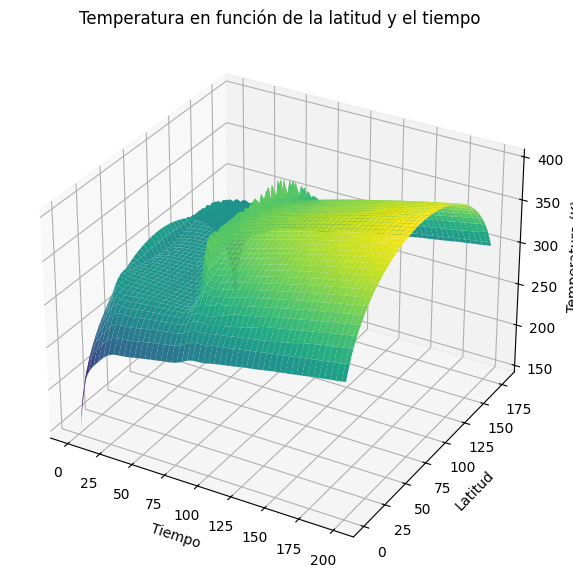

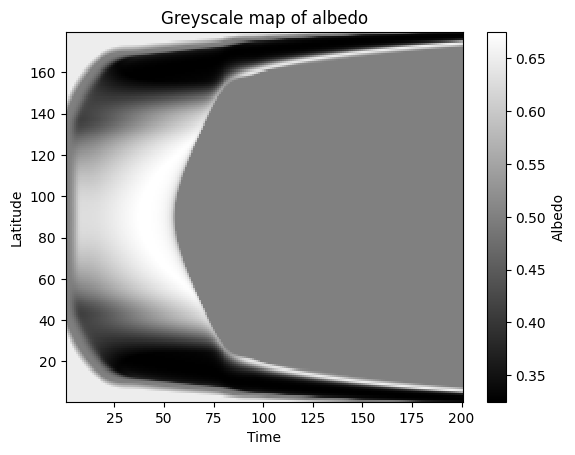

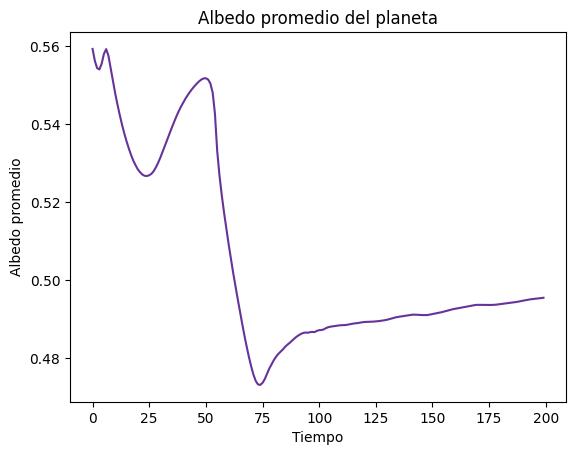

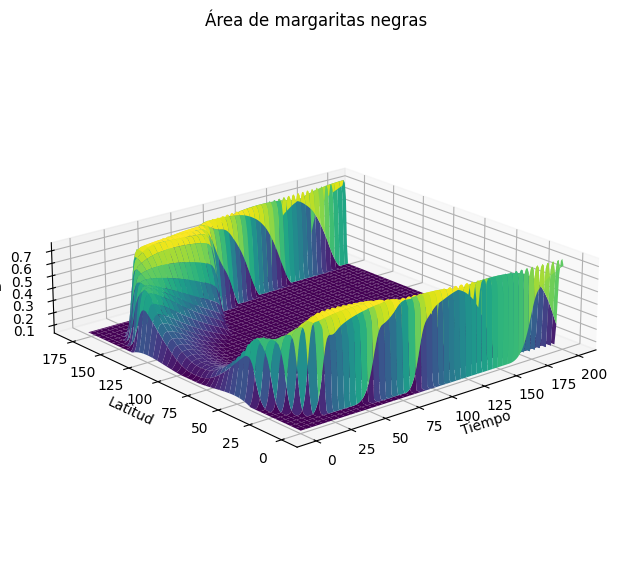

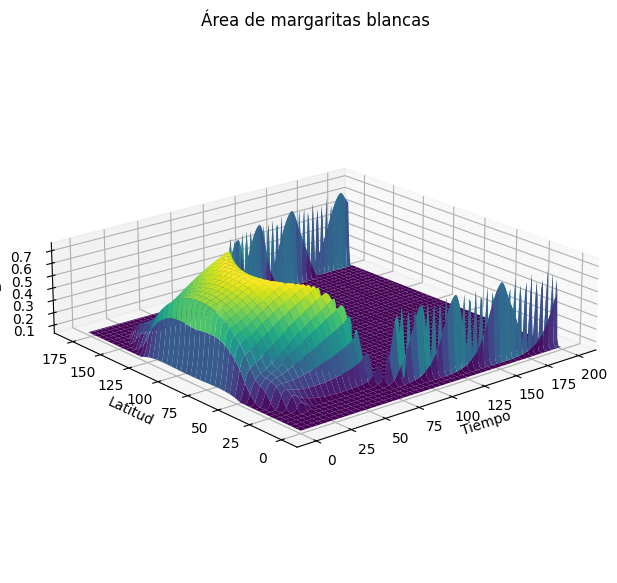

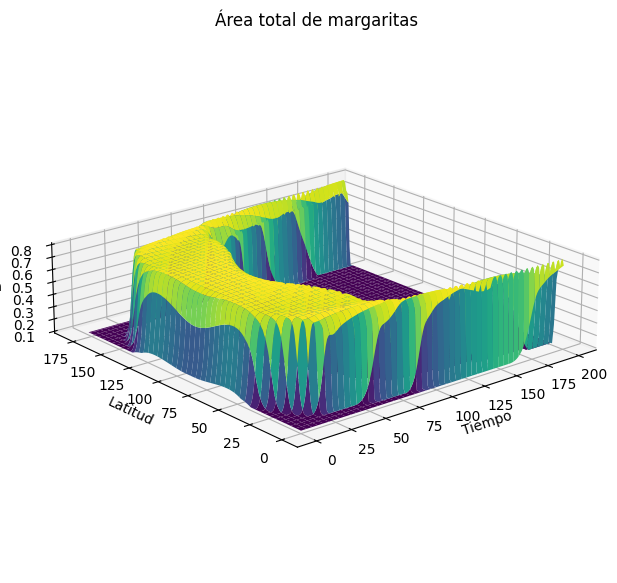

In [ ]:
def daisyice(lower,upper):

  iniblack = True
  iniwhite = True
  S = 1000
  q = 20
  black = 0.25
  white = 0.75
  death = 0.2
  bare = 0.5
  icealbedo = 0.65 # parámetro agregado, albedo del hielo
  lowgrowthK = 278
  highgrowthK = 313
  startarea = 0.05
  numba = 100
  SB = 5.669*10**(-8)
  latdiv = 179
  heatcon = 0.75
  outgoingheat = 0.9
  inc = 180/latdiv
  lat = np.arange(inc, 180, inc) # vector que contiene las latitudes del planeta
  d = len(lat)
  AB = startarea*np.ones(d)
  AW = startarea*np.ones(d)
  AP = np.zeros(d)
  transfer = np.zeros(d)



  # Inicializa el área de las margaritas para permitir que comience el crecimiento
  if iniblack and iniwhite:
      print('Ambas margaritas existen')
      Ablack = startarea
      Awhite = startarea
  elif iniblack and not iniwhite:
      print('Sólo existen margaritas negras')
      Ablack = startarea
      Awhite = 0
  elif iniwhite and not iniblack:
      print('Sólo existen margaritas blancas')
      Ablack = 0
      Awhite = startarea


  # Calcula el número de pasos de tiempo

  length = round((upper-lower)*numba)
  boof = abs(length)
  print(type(length))
  # Definimos la variación de la insolación solar

  if length > 0:  # si la insolación aumenta
      jump = (upper * S - lower * S) / (length - 1)
      E = [lower * S]
      for a in range(1, length):
          E.append(E[a - 1] + jump)

  if length < 0:  # si la insolación disminuye
      jump = (lower * S - upper * S) / (boof + 1)
      E = [lower * S]
      for a in range(1, boof):
          E.append(E[a - 1] - jump)

  if length < 0:
      length = abs(length)

  # Matrices de ceros para ir almacenando resultados en cada iteración

  Temissionresults = np.zeros((d, length))
  Tsun = np.zeros((d, length))
  Trockresults = np.zeros((d, length))
  Tblackresults = np.zeros((d, length))
  Twhiteresults = np.zeros((d, length))

  Ablackresults = np.zeros((d, length))
  Awhiteresults = np.zeros((d, length))
  Abareresults = np.zeros((d, length))
  Apresults = np.zeros((d, length))

  # Iteraciones para cada paso de tiempo
  for a in range(1,length+1):
    Ecurrent = E[a-1]
    # Iteraciones para cada latitud
    for b in range(d):
      Scurrent = np.sin(np.deg2rad(lat[b]))*Ecurrent # calcula la energía recibida en cada latitud

      Ablackresults[b, a - 1], Abareresults[b,a-1], Awhiteresults[b, a - 1], Temissionresults[b, a - 1],\
      Trockresults[b,a-1], Tblackresults[b, a - 1], Twhiteresults[b, a - 1], AP[b],\
      Tsun[b, a - 1] = daisyworldb(AB[b], AW[b], transfer[b], black, bare, white, Scurrent, q, death,\
                                   startarea, lowgrowthK, highgrowthK, iniblack, iniwhite)

      AB[b] = Ablackresults[b, a - 1]
      AW[b] = Awhiteresults[b, a - 1]

      if Temissionresults[b, a - 1] <= 263:
        AP[b] = icealbedo
      elif Temissionresults[b, a - 1] > 263 and Temissionresults[b, a - 1] <= 273:
        AP[b] = icealbedo - ((Temissionresults[b, a - 1]-263)/10)*(icealbedo-bare)

      Apresults[b, a - 1] = AP[b]
    # Modelamos el intercambio de calor entre latitudes
    for f in range(d // 2, d):
          Temissionresults[f, a - 1] = Temissionresults[f, a - 1] + heatcon * (1 - (d // 2) * np.exp(-(1 / q) * f)) * (Temissionresults[f - 1, a - 1] - Temissionresults[f, a - 1])
          Temissionresults[d - f - 1, a - 1] = Temissionresults[f, a - 1] # simetría esférica

    transfer[:] = outgoingheat * (Temissionresults[:, a - 1] - Tsun[:, a - 1])

  # Gráfico de temperatura, latitud, tiempo.
  tiempo = np.arange(1, length+1)
  X, Y = np.meshgrid(tiempo,lat)
  fig = plt.figure(figsize=(7, 7))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X,Y,Temissionresults, cmap='viridis')
  ax.set_title('Temperatura en función de la latitud y el tiempo')
  ax.set_xlabel('Tiempo')
  ax.set_ylabel('Latitud')
  ax.set_zlabel('Temperatura (K)')
  plt.show()


  plt.pcolormesh(X, Y, Apresults, shading='auto', cmap='gray')
  plt.colorbar(label='Albedo')
  plt.title('Greyscale map of albedo')
  plt.xlabel('Time')
  plt.ylabel('Latitude')
  plt.show()


  plt.plot(np.mean(Apresults, axis=0), color='rebeccapurple')
  plt.title('Albedo promedio del planeta')
  plt.xlabel('Tiempo')
  plt.ylabel('Albedo promedio')
  plt.show()

  fig = plt.figure(figsize=(7,7))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X,Y,Ablackresults, cmap='viridis')
  ax.set_title('Área de margaritas negras')
  ax.set_xlabel('Tiempo')
  ax.set_ylabel('Latitud')
  ax.set_zlabel('Área')
  ax.set_box_aspect([2, 2, 0.5])
  ax.view_init(elev=20, azim=230)



  fig = plt.figure(figsize=(7,7))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X,Y,Awhiteresults, cmap='viridis')
  ax.set_title('Área de margaritas blancas')
  ax.set_xlabel('Tiempo')
  ax.set_ylabel('Latitud')
  ax.set_zlabel('Área')
  ax.set_box_aspect([2, 2, 0.5])
  ax.view_init(elev=20, azim=230)



  fig = plt.figure(figsize=(7,7))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X,Y,Awhiteresults+Ablackresults, cmap='viridis')
  ax.set_title('Área total de margaritas')
  ax.set_xlabel('Tiempo')
  ax.set_ylabel('Latitud')
  ax.set_zlabel('Área')
  ax.set_box_aspect([2, 2, 0.5])
  ax.view_init(elev=20, azim=230)



daisyice(1,3)

### Daisyworld depredadores

Al modelo original se agregan dos depredadores: conejos, que se alimentan de margaritas, y zorros, que se alimentan de conejos, formando así una red trófica en el planeta. Además, se introduce la presencia cíclica de plagas que disminuyen el área de margaritas. Se rige mediante las siguientes ecuaciones:



1.   Dependencia margaritas - plagas.

Las plagas se "activan" **sólo** en años específicos. Al hacerlo, el área de margaritas blancas y negras disminuye en función a la severidad de la plaga (constante).

\begin{equation}
  A_b = A_{b(pre)}(1-blacksevere)\\
  A_w = A_{w(pre)}(1-whitesevere)
\end{equation}


2.   Población conejos.

Depende directamente de la disponibilidad de margaritas.

\begin{equation}
  \frac{dR_{pop}(t)}{dt} = r_{fix}*grab*R_{pop}(t)* \left(reat*(A_w(t) + A_b(t))\right)^2 - r_{death}
\end{equation}


Donde:

*   $R_{pop}$: Población de conejos
*   $r_{fix}$: porcentaje de alimento consumido (margaritas) que se convierte en biomasa de conejo (cte).
*   $grab$: tasa de crecimiento de conejos (cte).
*   $reat$: accesibilidad de margaritas para conejos (cte).
*   $r_{death}$: tasa de muerte de conejos (cte).


3.   Población conejos.

Depende directamente de la disponibilidad de margaritas.

\begin{equation}
  \frac{dF_{pop}(t)}{dt} = f_{fix}*gfox*F_{pop}(t)* \left(reat*R_{pop}(t)\right)^2 - f_{death}
\end{equation}


Donde:

*   $F_{pop}$: Población de zorros
*   $f_{fix}$: porcentaje de alimento consumido (conejos) que se convierte en biomasa de zorro (cte).
*   $gfox$: tasa de crecimiento de zorro (cte).
*   $feat$: accesibilidad de conejos para zorros (cte).
*   $f_{death}$: tasa de muerte de zorros (cte).




Ambas margaritas existen


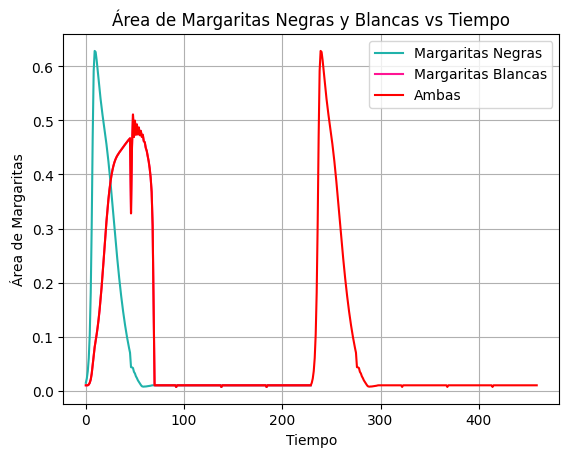

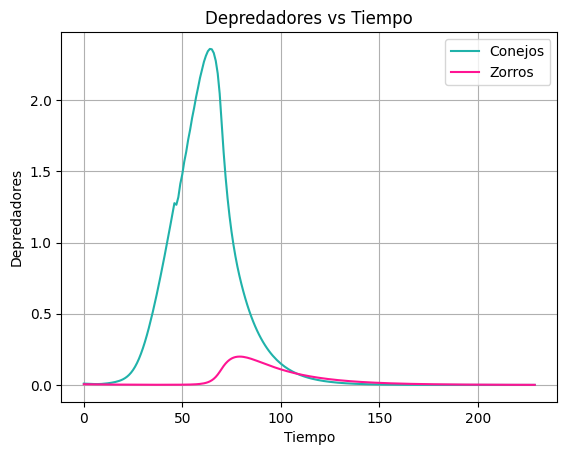

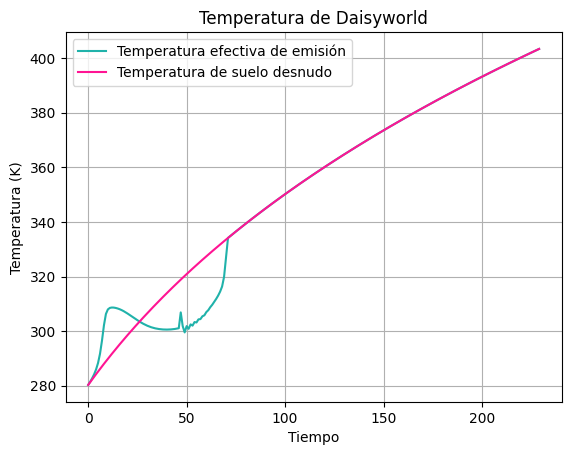

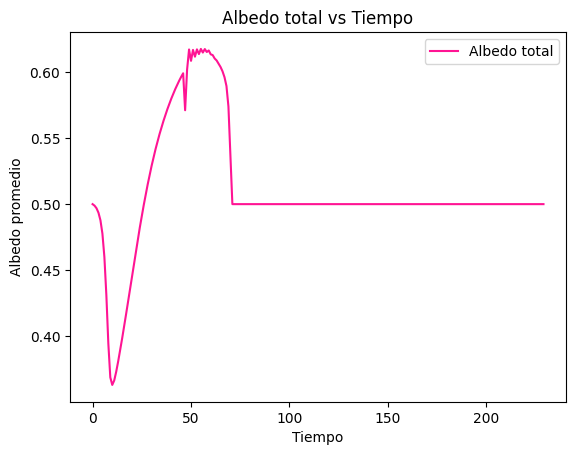

In [ ]:


def daisypred(lower,upper):
  # Parámetros iniciales
  iniblack = True
  iniwhite = True


  S = 1000 #energía solar en W/m^2
  q = 15 #flujo de calor horizontal
  black = 0.25 # albedo de margaritas negras
  white = 0.75 # albedo de margaritas blancas
  death = 0.1 # tasa de mortalidad de margaritas
  bare = 0.5 # albedo de suelo desnudo
  lowgrowthK = 278 # T mínima para el crecimiento de margaritas
  highgrowthK = 313 # T máxima para el crecimiento de margaritas

  # Parámetros nuevos
  grab = 2.5 # tasa de crecimiento de los conejos
  gfox = 0.8 # tasa de crecimiento de los zorros
  blacksevere = 0.3 # porcentaje de severidad de cada plaga (fracción de area de margaritas negras que matan)
  whitesevere = 0.3 # porcentaje de severidad de cada plaga (fracción de area de margaritas blancas que matan)
  plagues = 4 # número de plagas
  rfix = 0.3 # porcentaje de alimento consumido (margaritas) que se convierte en biomasa de conejo.
  ffix = 0.5 # porcentaje de alimento consumido (conejo) que se convierte en biomasa de zorro.
  rminpop = 0.01
  fminpop = 0.005
  rdeath = 0.1
  fdeath = 0.1
  reat = 0.8 # accesibilidad de margaritas para conejos
  feat = 0.4 # accesibilidad de conejos para zorros
  startarea = 0.01 # área inicial cubierta por margaritas (fracción de 1)
  numba = 100 # número de pasos de tiempo relativos

  SB = 5.669*10**(-8) # constante de Stefan-Boltzman

  # Inicializamos población de depredadores
  Rpop = rminpop
  Fpop = fminpop

  # Calcula el número de pasos de tiempo

  length = round((upper-lower)*numba)
  boof = abs(length)

  # Tiempos de plaga
  plaguetime = []
  plinc = 0
  if plagues >=1:
    plague = int(round(length/(plagues+1)))
    for z in range(plagues):
            plaguetime.append(plague + plinc)
            plinc = plaguetime[z]

  # Inicializa el área de las margaritas para permitir que comience el crecimiento
  if iniblack and iniwhite:
      print('Ambas margaritas existen')
      Ablack = startarea
      Awhite = startarea
  elif iniblack and not iniwhite:
      print('Sólo existen margaritas negras')
      Ablack = startarea
      Awhite = 0
  elif iniwhite and not iniblack:
      print('Sólo existen margaritas blancas')
      Ablack = 0
      Awhite = startarea



  # Definimos la variación de la insolación solar

  if length > 0:  # si la insolación aumenta
      jump = (upper * S - lower * S) / (length - 1)
      E = [lower * S]
      for a in range(1, length):
          E.append(E[a - 1] + jump)

  if length < 0:  # si la insolación disminuye
      jump = (lower * S - upper * S) / (boof + 1)
      E = [lower * S]
      for a in range(1, boof):
          E.append(E[a - 1] - jump)

  if length < 0:
      length = abs(length)

  # Listas vacías para ir almacenando resultados en cada iteración

  Temissionresults = []
  Ablackresults = []
  Awhiteresults = []
  Trockresults = []
  Apresults = []
  Rresults = []
  Fresults = []

  # Iteraciones para cada paso de tiempo
  for a in range(length):

    oldRpop = Rpop
    oldFpop = Fpop
    oldAwhite = Awhite
    oldAblack = Ablack

    Abare = 1 - Ablack - Awhite # área de suelo desnudo
    Ap = Abare*bare + Awhite*white + Ablack*black # albedo total (ponderándolo)

    Temission = ((E[a] / SB) * (1 - Ap))**0.25 # T_e utilizando fórmula (1)
    Trock = ((E[a] / SB) * (1 - bare))**0.25 # temperatura en el caso de planeta sin vida
    Tblack = q * (Ap - black) + Temission
    Twhite = q * (Ap - white) + Temission

    growthb = Ablack * (beta(lowgrowthK, highgrowthK, Tblack) * Abare - death) # ecuaciones 4
    growthw = Awhite * (beta(lowgrowthK, highgrowthK, Twhite) * Abare - death)
    Ablack += growthb # actualizamos áreas
    Awhite += growthw

    # Nos aseguramos que el área este en un rango factible
    if iniblack and not iniwhite:
        Ablack = max(startarea, min(Ablack, 1))
    elif iniwhite and not iniblack:
        Awhite = max(startarea, min(Awhite, 1))
    elif iniwhite and iniblack:
        Ablack = max(startarea, min(Ablack, 1))
        Awhite = max(startarea, min(Awhite, 1))

    # Efecto de la depredación
    for y in plaguetime:
      if y == a:
        Ablack = Ablack*(1-blacksevere)
        Awhite = Awhite*(1-whitesevere)

    # Calculamos el crecimiento de los conejos
    Rpopgrowth = grab*oldRpop*((reat*(oldAwhite + oldAblack))**2 - rdeath)
    Rpop += rfix*Rpopgrowth

    if Rpopgrowth > 0:
      Ablack -= Ablack*Rpopgrowth
      Awhite -= Awhite*Rpopgrowth

    # Calculamos el crecimiento de los zorros
    Fpopgrowth = gfox*oldFpop*((feat*oldRpop)**2 - fdeath)
    Fpop += ffix*Fpopgrowth

    if Fpopgrowth > 0:
      Rpop -= Rpop*Fpopgrowth

    Temissionresults.append(Temission)
    Ablackresults.append(Ablack)
    Awhiteresults.append(Awhite)
    Trockresults.append(Trock)
    Apresults.append(Ap)
    Rresults.append(Rpop)
    Fresults.append(Fpop)



  # Gráfico del área de margaritas vs tiempo
  plt.plot(Ablackresults, label='Margaritas Negras', color='lightseagreen')
  plt.plot(Awhiteresults, label='Margaritas Blancas', color='deeppink')
  plt.plot(Awhiteresults+Ablackresults, label='Ambas', color='red')
  plt.title('Área de Margaritas Negras y Blancas vs Tiempo')
  plt.xlabel('Tiempo')
  plt.ylabel('Área de Margaritas')
  plt.legend()
  plt.grid(True)
  plt.show()

  # Depredadores vs tiempo
  plt.plot(Rresults, label='Conejos', color='lightseagreen')
  plt.plot(Fresults, label='Zorros', color='deeppink')
  plt.title('Depredadores vs Tiempo')
  plt.xlabel('Tiempo')
  plt.ylabel('Depredadores')
  plt.legend()
  plt.grid(True)
  plt.show()



  # Gráfico de temperatura vs tiempo
  plt.plot(Temissionresults, label='Temperatura efectiva de emisión', color='lightseagreen')
  plt.plot(Trockresults, label='Temperatura de suelo desnudo', color='deeppink')
  plt.title('Temperatura de Daisyworld')
  plt.xlabel('Tiempo')
  plt.ylabel('Temperatura (K)')
  plt.legend()
  plt.grid(True)
  plt.show()

  # Albedo total vs tiempo
  plt.plot(Apresults, label='Albedo total', color='deeppink')
  plt.title('Albedo total vs Tiempo')
  plt.xlabel('Tiempo')
  plt.ylabel('Albedo promedio')
  plt.legend()


daisypred(0.7,3)

### Daisyworld $CO_2$ (*)

 Integra la influencia del $CO_2$ en el crecimiento de margaritas y el balance energético.


Ambas margaritas existen


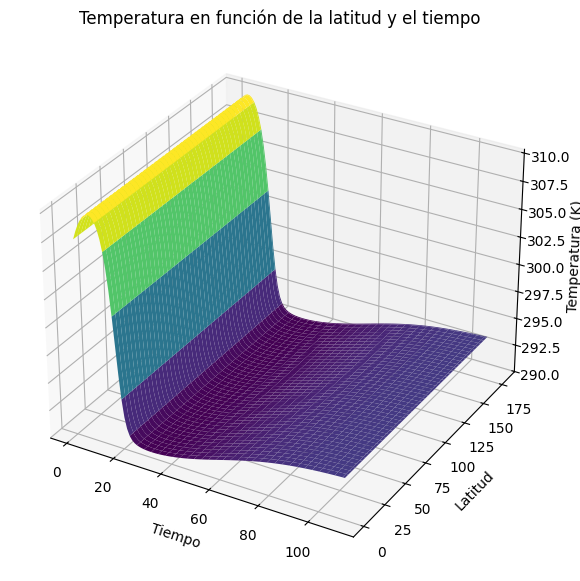

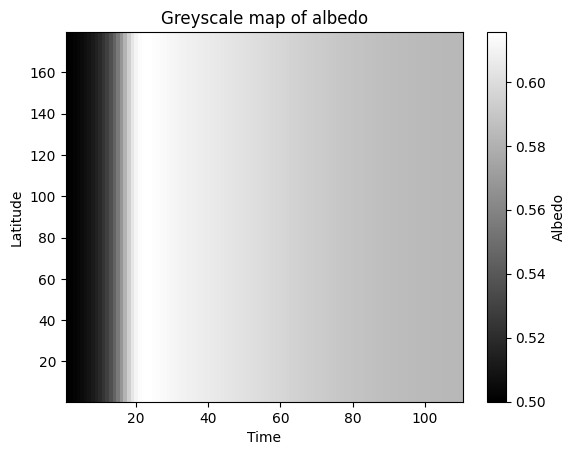

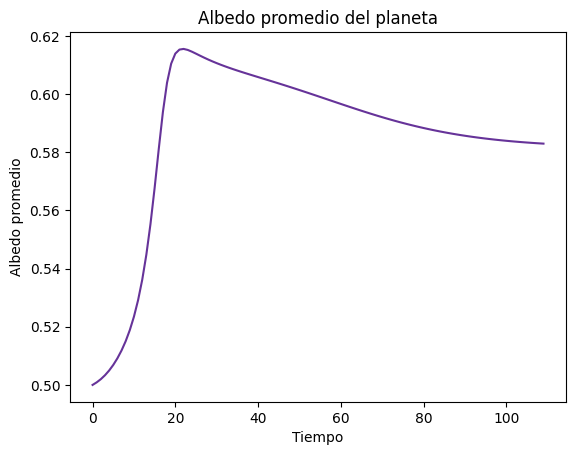

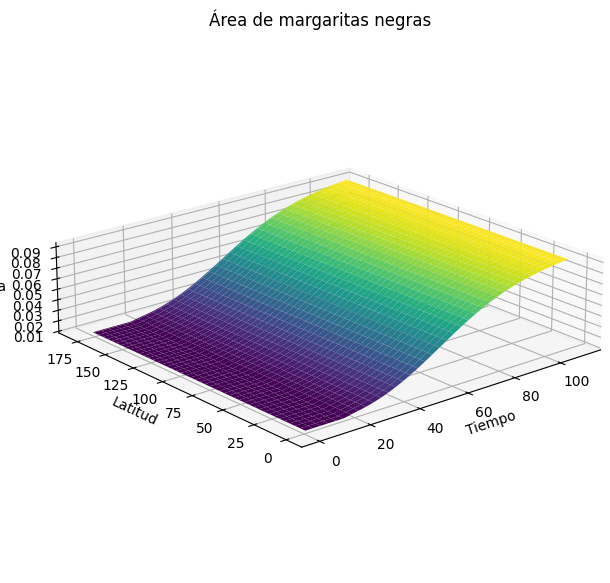

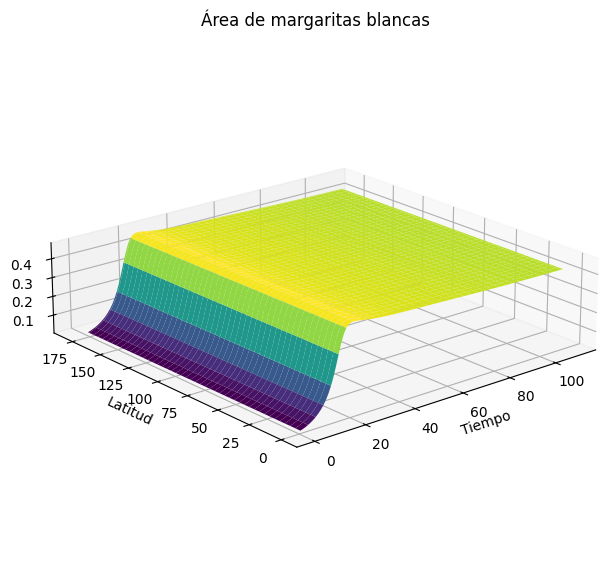

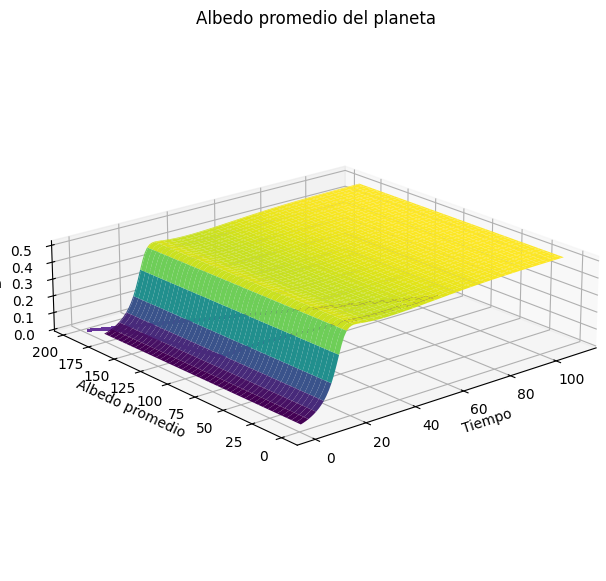

In [ ]:
def daisyCO21(lower,upper):

  iniblack = True
  iniwhite = True
  S = 1000
  q = 20
  black = 0.25
  white = 0.75
  death = 0.2
  bare = 0.5
  lowgrowthK = 278
  highgrowthK = 313
  startarea = 0.01
  numba = 100
  SB = 5.669*10**(-8)
  latdiv = 179
  heatcon = 0.75
  outgoingheat = 0.9
  inc = 180/latdiv
  lat = np.arange(inc, 180, inc)
  d = len(lat)
  AB = startarea*np.ones(d)
  AW = startarea*np.ones(d)
  AP = np.zeros(d)
  transfer = np.zeros(d)

  # Parámetros nuevos
  rango = 2   # intensidad del efecto invernadero del CO2 (K)
  const = 1   # inversamente proporcional a la restricción del crecimiento por el CO2
  carbon = 200   # CO2 total en el modelo
  carb = carbon/latdiv   # CO2 en la atmósfera (por latitud)

  # Inicializa el área de las margaritas para permitir que comience el crecimiento
  if iniblack and iniwhite:
      print('Ambas margaritas existen')
      Ablack = startarea
      Awhite = startarea
  elif iniblack and not iniwhite:
      print('Sólo existen margaritas negras')
      Ablack = startarea
      Awhite = 0
  elif iniwhite and not iniblack:
      print('Sólo existen margaritas blancas')
      Ablack = 0
      Awhite = startarea


  # Calcula el número de pasos de tiempo

  length = round((upper-lower)*numba)
  boof = abs(length)


  # Para la transferencia de calor
  carblat = carb*np.ones(d)
  carbav = np.mean(carblat)
  totalcarb = np.zeros(length)


  # Definimos la variación de la insolación solar

  if length > 0:  # si la insolación aumenta
      jump = (upper * S - lower * S) / (length - 1)
      E = [lower * S]
      for a in range(1, length):
          E.append(E[a - 1] + jump)

  if length < 0:  # si la insolación disminuye
      jump = (lower * S - upper * S) / (boof + 1)
      E = [lower * S]
      for a in range(1, boof):
          E.append(E[a - 1] - jump)

  if length < 0:
      length = abs(length)

  # Matrices de ceros para ir almacenando resultados en cada iteración

  Temissionresults = np.zeros((d, length))
  Tsun = np.zeros((d, length))
  Trockresults = np.zeros((d, length))
  Tblackresults = np.zeros((d, length))
  Twhiteresults = np.zeros((d, length))

  Ablackresults = np.zeros((d, length))
  Awhiteresults = np.zeros((d, length))
  Abareresults = np.zeros((d, length))
  Apresults = np.zeros((d, length))

  # Iteraciones para cada paso de tiempo
  for a in range(1,length+1):
    Ecurrent = E[a-1]
    # Iteraciones para cada latitud
    for b in range(d):
      Scurrent = np.sin(np.deg2rad(lat[b]))*Ecurrent # calcula la energía recibida en cada latitud

      if carblat[b] < 0:
        carblat[b] = 0

      if carblat[b] > carb:
        carblat[b] = carb


      Ablackresults[b, a - 1], Abareresults[b,a-1], Awhiteresults[b, a - 1], Temissionresults[b, a - 1],\
      Trockresults[b,a-1], Tblackresults[b, a - 1], Twhiteresults[b, a - 1], Apresults[b, a - 1],\
      Tsun[b, a - 1] = daisyworldc(AB[b], AW[b], transfer[b], carb, carbav, rango, black, bare, white, S, q,\
                                   death, startarea, lowgrowthK, highgrowthK, const, iniblack, iniwhite)

      AB[b] = Ablackresults[b, a - 1]
      AW[b] = Awhiteresults[b, a - 1]
      AP[b] = Apresults[b, a - 1]
      carblat[b] = carb - (AB[b] + AW[b])

    # Modelamos el intercambio de calor entre latitudes
    for f in range(d // 2, d):
          Temissionresults[f, a - 1] = Temissionresults[f, a - 1] + heatcon * (1 - (d // 2) * np.exp(-(1 / q) * f)) * (Temissionresults[f - 1, a - 1] - Temissionresults[f, a - 1])
          Temissionresults[d - f - 1, a - 1] = Temissionresults[f, a - 1] # simetría esférica

    transfer[:] = outgoingheat * (Temissionresults[:, a - 1] - Tsun[:, a - 1])
    carbav = np.mean(carblat)
    totalcarb[a-1] = np.sum(carblat)

  # Gráfico de temperatura, latitud, tiempo.
  tiempo = np.arange(1, length+1)
  X, Y = np.meshgrid(tiempo,lat)
  fig = plt.figure(figsize=(7, 7))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X,Y,Temissionresults, cmap='viridis')
  ax.set_title('Temperatura en función de la latitud y el tiempo')
  ax.set_xlabel('Tiempo')
  ax.set_ylabel('Latitud')
  ax.set_zlabel('Temperatura (K)')
  plt.show()


  plt.pcolormesh(X, Y, Apresults, shading='auto', cmap='gray')
  plt.colorbar(label='Albedo')
  plt.title('Greyscale map of albedo')
  plt.xlabel('Time')
  plt.ylabel('Latitude')
  plt.show()


  plt.plot(np.mean(Apresults, axis=0), color='rebeccapurple')
  plt.title('Albedo promedio del planeta')
  plt.xlabel('Tiempo')
  plt.ylabel('Albedo promedio')
  plt.show()

  fig = plt.figure(figsize=(7,7))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X,Y,Ablackresults, cmap='viridis')
  ax.set_title('Área de margaritas negras')
  ax.set_xlabel('Tiempo')
  ax.set_ylabel('Latitud')
  ax.set_zlabel('Área')
  ax.set_box_aspect([2, 2, 0.5])
  ax.view_init(elev=20, azim=230)



  fig = plt.figure(figsize=(7,7))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X,Y,Awhiteresults, cmap='viridis')
  ax.set_title('Área de margaritas blancas')
  ax.set_xlabel('Tiempo')
  ax.set_ylabel('Latitud')
  ax.set_zlabel('Área')
  ax.set_box_aspect([2, 2, 0.5])
  ax.view_init(elev=20, azim=230)



  fig = plt.figure(figsize=(7,7))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X,Y,Awhiteresults+Ablackresults, cmap='viridis')
  ax.set_title('Área total de margaritas')
  ax.set_xlabel('Tiempo')
  ax.set_ylabel('Latitud')
  ax.set_zlabel('Área')
  ax.set_box_aspect([2, 2, 0.5])
  ax.view_init(elev=20, azim=230)


  plt.plot(X, totalcarb, color='rebeccapurple')
  plt.title('Albedo promedio del planeta')
  plt.xlabel('Tiempo')
  plt.ylabel('Albedo promedio')
  plt.show()



daisyCO21(0.5,1.6)
